In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing, basinhopping
import os 

from scipy.stats import betabinom, poisson, norm
from ts_utils.deconvolution import *
import seaborn as sns

In [3]:
simulation = pd.read_csv('data/process_noise_SEIR.csv')
incubation_period = pd.read_csv('incubation_period.csv')['seir']
obs_symptomatic_incidence = simulation['obs_symptomatic_incidence'].to_numpy()

In [4]:
rl_optimizer_l2 = opt_deconv(obs_symptomatic_incidence,incubation_period, a=1E5, degree=2).x

In [5]:
rl_optimizer_l1 = opt_deconv(obs_symptomatic_incidence,incubation_period, a=10, degree=1).x

In [6]:
nb_optimized = opt_deconv_nb(obs_symptomatic_incidence,incubation_period, a=10, degree=1).x
rl_optimizer_nb = nb_optimized[:len(obs_symptomatic_incidence)]
print(nb_optimized[len(obs_symptomatic_incidence):])

[0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331
 0.68412331 0.68412331 0.68412331 0.68412331 0.68412331 0.6841

In [16]:

filtered = wavelet_lp_filter(simulation['obs_symptomatic_incidence'], cutoff=1, wavelet='dmey')

#nb_optimized = opt_deconv_nb(filtered,incubation_period, a=10, degree=1).x
#rl_optimizer_filter = nb_optimized[:len(obs_symptomatic_incidence)]
rl_optimizer_filter = opt_deconv(filtered,incubation_period, a=5E4, degree=2).x

There are 3 levels.


In [17]:
filtered = wavelet_lp_filter(simulation['obs_symptomatic_incidence'], 1, wavelet='dmey')
wiener = wiener_deconvolution(filtered, incubation_period, 0.2)

There are 3 levels.


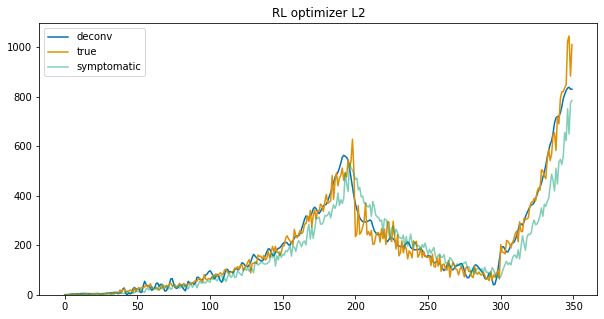

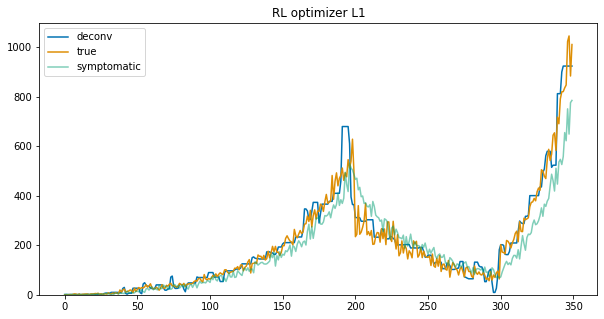

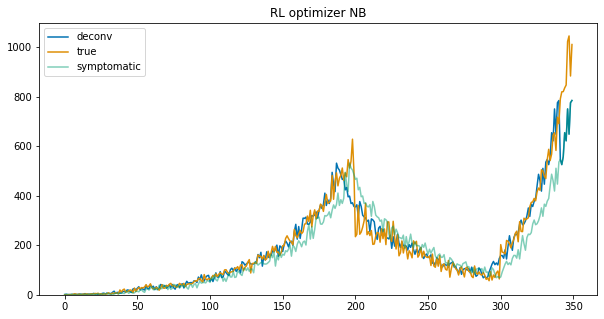

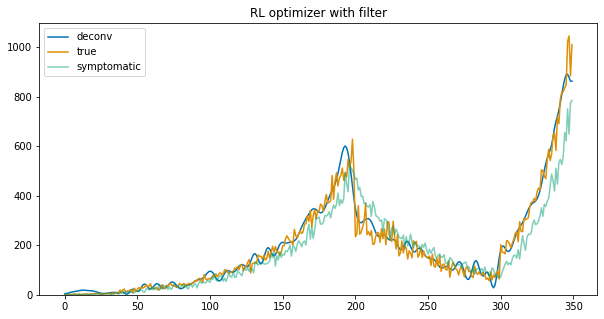

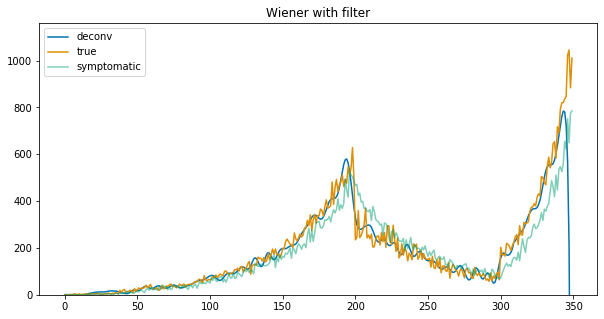

In [18]:
sns.set_palette('colorblind')
deconv_names = ['RL optimizer L2', 'RL optimizer L1', 'RL optimizer NB', 'RL optimizer with filter', 'Wiener with filter']
all_xs = [rl_optimizer_l2, rl_optimizer_l1, rl_optimizer_nb, rl_optimizer_filter, wiener]
for i, x in enumerate(all_xs):
    plt.figure(figsize=(10, 5))
    plt.title(deconv_names[i])
    plt.plot(x, label='deconv')
    plt.plot(simulation['scaled_true_incidence'], label='true')
    plt.plot(simulation['obs_symptomatic_incidence'], alpha=0.5, label='symptomatic')
    plt.legend()
    plt.ylim(0,)
    plt.savefig('figures/seir'+ deconv_names[i]+'.png')

There are 3 levels.


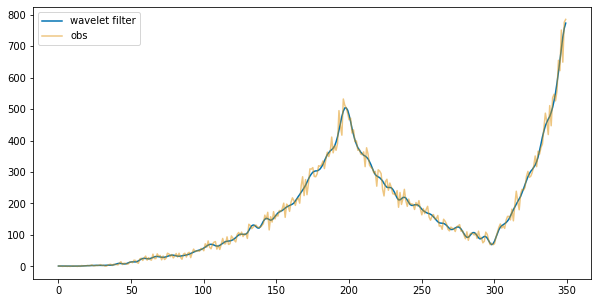

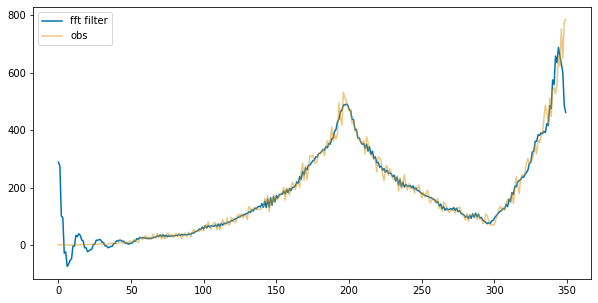

In [15]:
plt.figure(figsize=(10, 5))


plt.plot(wavelet_lp_filter(simulation['obs_symptomatic_incidence'], 1,  wavelet='dmey'), label='wavelet filter')
plt.plot(simulation['obs_symptomatic_incidence'], label='obs', alpha=0.5)

plt.legend()
plt.savefig('figures/wavelet_seir.png')

plt.figure(figsize=(10, 5))
plt.plot(fft_filter(simulation['obs_symptomatic_incidence'], 7, k=5), label='fft filter')
plt.plot(simulation['obs_symptomatic_incidence'], label='obs', alpha=0.5)

plt.legend()
plt.savefig('figures/fft_seir.png')